# 00: Introduction to QuTiP

In this first tutorial, you'll play around with the core of QuTiP.

This includes constructing quantum states (e.g. qubits), quantum operators (e.g.
gates in a quantum circuit), Hamiltonians, and density matrices. Near the end
you'll simulate the evolution of a quantum system using QuTiP's numerical solver
for the Schrödinger equation and visualize the result. Along the way you'll find
eigenvalues and eigenvectors and plot states on the Bloch sphere.

Individually none of the tasks should require more than a few lines of code, but
there is a lot to explore. Take your time. Tackle individual steps in multiple
ways. Read the documentation on the functions you're using. Explore the objects
you're creating. Ask questions.

The topics covered in this tutorial will form the foundation we use during the
rest of the week -- and that you'll use when using QuTiP yourself once the
Summer school is over.

## Tasks

- [Pre-flight check](#pre-flight-check)
- [Import qutip](#imports)
- [Accessing documentation](#accessing-documentation)
- [States](#states)
- [Bloch sphere](#bloch-sphere)
- [Operators](#operators)
- [Eigenvalues and eigenstates](#eigenvalues-and-eigenstates)
- [Density matrices](#density-matrices)
- [Time-dependent operators](#time-dependent-operators)
- [Tensor products and partial traces](#tensor-products-and-partial-traces)
- [Hamiltonians](#hamiltonians)
- [Solving the Schrödinger Equation using sesolve](#solving-the-Schrödinger-Equation-using-sesolve)
- [Using functions to make your notebooks neater](#using-functions-to-make-your-notebooks-neater)

## Pre-flight check

If you haven't installed Python, QuTiP, Jupyter and the other requirements yet, do so now by following one of the [sets of instructions](https://github.com/hodgestar/qutip-asqsqis-2022/).

You can test that your setup is working by running the [smoke test notebook](https://github.com/hodgestar/qutip-asqsqis-2022/blob/main/smoke-test.ipynb).

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import qutip
import numpy as np

## Helper functions

In [3]:
def display_list(a, title=None):
    """ Display a list of items using Jupyter's display function. """
    if title:
        print(title)
        print("=" * len(title))
    for item in a:
        display(item)

In [4]:
def print_attrs(obj, name, attrs):
    """ Print the listed attributes of an object. """
    for attr in attrs:
        print(f"{name}.{attr}: {getattr(obj, attr)}")

In [5]:
def show_bloch(states, vector_color=None, vector_alpha=None):
    """ Show states or density matrices on the Bloch sphere. """
    bloch = qutip.Bloch()
    bloch.add_states(states)
    if vector_color is not None:
        if vector_color == "rb":
            vector_color = [
                (c, 0, 1 - c) for c in np.linspace(0.1, 1.0, len(states))
            ]
        bloch.vector_color = vector_color
    if vector_alpha is not None:
        bloch.vector_alpha = vector_alpha
    bloch.show()

In [6]:
def display_eigenstates(op):
    """ Display the eigenvalues and eigenstates of an operator. """
    evals, evecs = op.eigenstates()
    print("Eigenvalues:", evals)
    print()
    print("Eigenstates")
    print("===========")
    for v in evecs:
        display(v)

## Accessing documentation

Once you're back home after the summer school, the QuTiP documentation will be your primary means of learning how to use QuTiP. In these tutorials, we'll encourage you to read the documentation first, so that by the end of the week, you'll be familiar with it and able to answer many of your own questions by reading it.

You'll read the documentation in two main ways:

- You can type a `?` after any Python object to read its documentation. You can try it right now by typing `qutip.ket?` into notebook cell and pressing enter.

- You can find the documentation online at [qutip.org](https://qutip.org/documentation.html). Open it now and have a look. You can also download it as a PDF in case you need to work offline.

## States

- Creating and examining quantum states
- Arithmetic with states
- Checking whether states are equal and whether states with a different global phase are equal
- What is a Qobj?

Functions you'll want to try out in this section are:

- `qutip.ket`
- `qutip.bra`
- `qutip.basis`

These functions all return a "quantum object" or `Qobj` which is the data type QuTiP uses to store all kinds of quantum objects (states, operators, density matrices). A `Qobj` has some many methods and attributes that are useful.

Some attributes to look at include `type`, `dims`, `shape`, `isket`, and `isbra`.

A few important methods are `.norm()`, `.unit()`, `.dag()`, and `.overlap(other)`.

You can use the arithmetic operators `*` and `+` as you would expect. Try out some simple numerical expressions from this morning's theory lecture.

There are many more methods and attributes, but these are enough to start with.

In [7]:
# a qubit in the |0> state
ket = qutip.ket("0")

In [8]:
# show some of the properties relevant to kets
display(ket)
print_attrs(ket, "ket", ["type", "dims", "shape", "isket", "isbra"])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

ket.type: ket
ket.dims: [[2], [1]]
ket.shape: (2, 1)
ket.isket: True
ket.isbra: False


In [9]:
# show the adjoint of the ket -- a bra
ket.dag()

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 0.]]

In [10]:
# construct the bra directly
bra = qutip.bra("0")

In [11]:
# a qubit in the |1> state
qutip.ket("1")

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [12]:
# construct |0> and |1> using qutip.basis
q0 = qutip.basis(2, 0)
q1 = qutip.basis(2, 1)
display_list([q0, q1])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [13]:
# show that Qobj's with the same values are equal
q0 == q0

True

In [14]:
# show that Qobj's with different global phases are not equal
display(q0 * 1j)
print("Equal:", q0 == q0 * 1j)
print("Overlap:", q0.overlap(q0 * 1j))
print("Overlap is 1:", np.abs(q0.overlap(q0 * 1j)) == 1.0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+1.j]
 [0.+0.j]]

Equal: False
Overlap: 1j
Overlap is 1: True


In [15]:
# orthogonal vectors have 0 overlap
q0.overlap(q1)

0j

In [16]:
# for states, the overlap is the inner product
print("q0 · q1:", (q0.dag() * q1).full()[0, 0])
print("q0 · q1:", (q1.dag() * q0).full()[0, 0])
print("(1j * q0) · q0:", ((1j * q0).dag() * q0).full()[0, 0])

q0 · q1: 0j
q0 · q1: 0j
(1j * q0) · q0: -1j


In [17]:
# adding states
q0 + q1

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [1.]]

In [18]:
# calculating the norm
(q0 + q1).norm()

1.4142135623730951

In [19]:
# manually normalizing a state to unit length
(q0 + q1) / (q0 + q1).norm()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [20]:
# using .unit() to normalize the length of a state
(q0 + q1).unit()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

## Bloch sphere

- Plotting 2-level states on the Bloch sphere
- Plotting many states at once
- Changing the colors
- Changing the transparency

QuTiP provides a class called `qutip.Bloch`. You can create an instance of it and add states to plot with `.add_states(...)`. Once you've added all the states you want to, you can all `.show()` to render it.

The Bloch sphere is very useful for visualizing the state of a two-level system, and you'll use it regularly.

You can change the colors and transparency of the arrow shown for each state by setting the `.vector_color` attribute to a list of colors, and the `.vector_alpha` attribute to a list of transparency values.

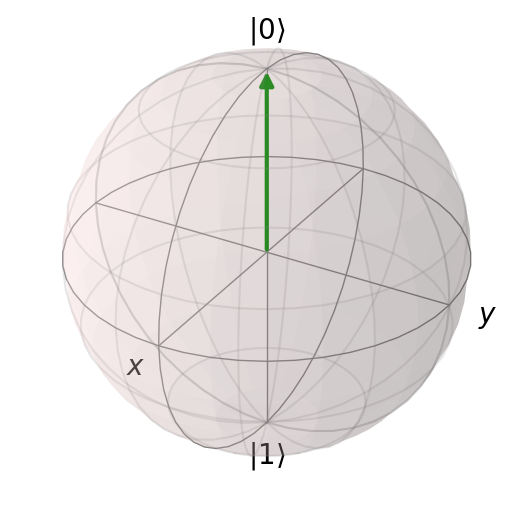

In [21]:
# show a single state
show_bloch(q0)

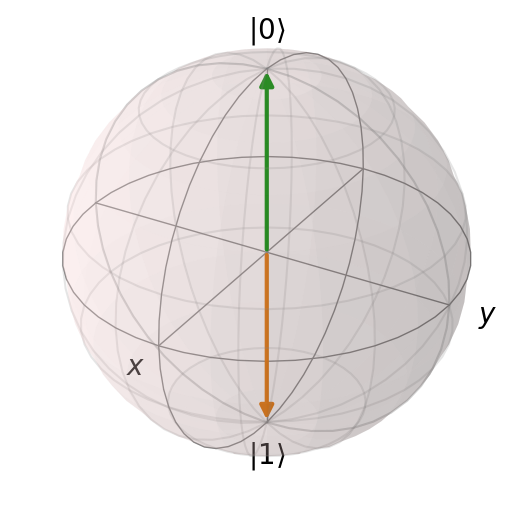

In [22]:
# show both basis states
show_bloch([q0, q1])

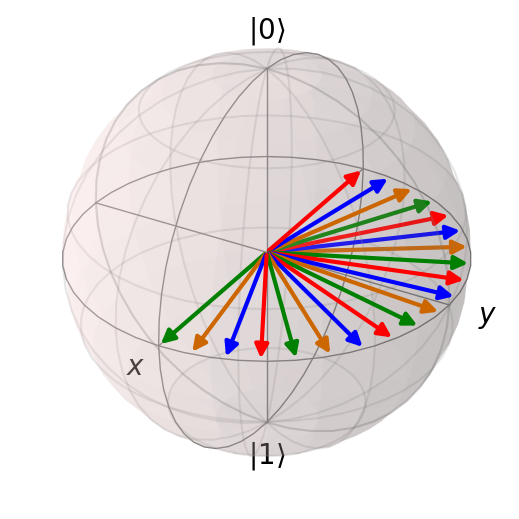

In [23]:
# show many states
theta = np.linspace(0, np.pi, 20)
states = [q0 + np.exp(1j * th) * q1 for th in theta]
states = [s.unit() for s in states]
show_bloch(states)

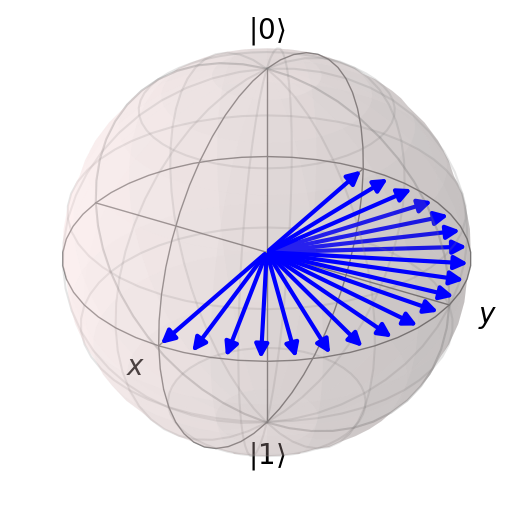

In [24]:
# How to remove the colours:
show_bloch(
    states,
    vector_color=[(0, 0, 1.0)] * len(states),
)

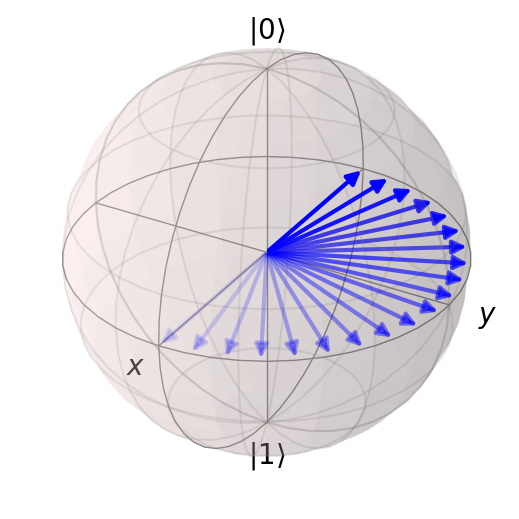

In [25]:
# Use transparency to show where states are in the list
show_bloch(
    states,
    vector_color=[(0, 0, 1.0)] * len(states),
    vector_alpha=np.linspace(0.1, 1.0, len(states)),
)

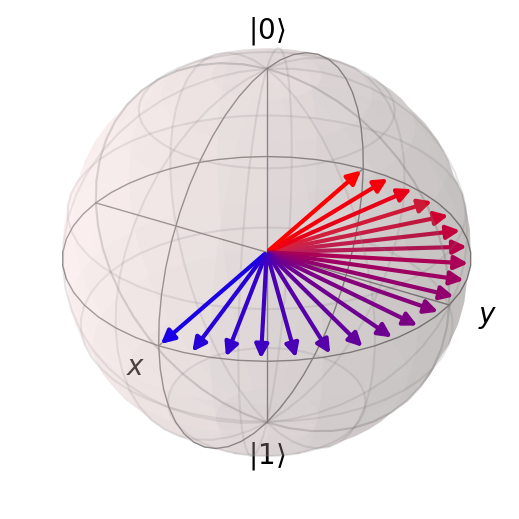

In [26]:
# Use color map to show where states are in the list
show_bloch(
    states,
    vector_color=[(c, 0, 1 - c) for c in np.linspace(0.1, 1.0, len(states))],
)

## Operators

- Creating and examining quantum operators
- Calculating expectation values
- Making projectors

Functions to read about and try out in this section are:

- `qutip.sigmax`, `qutip.sigmay`, `qutip.sigmaz`
- `qutip.qeye`
- `qutip.qip.operations.hadamard_transform`

Operators are also represented by `Qobj` instances and there are some attitional `Qobj` attributes that are relevant now: `type`, `isoper`, `dims`, `shape`, `isherm`. Look at those you've seen already and compare them with what you've already seen for states.

There are some additional `Qobj` methods to try out on operators -- `.diag()`, `.tr()` -- and some to revisit -- `.dag()`, `.norm()`, `.unit()`.

You can create a projection operator by calling `.proj()` on a state. Try this out. Also try creating the projector yourself without calling `.proj()`.

In [27]:
# the Pauli X operator
sx = qutip.sigmax()

In [28]:
# show some of the properties relevant to operators
display(sx)
print_attrs(sx, "sx", ["type", "isoper", "dims", "shape", "isherm"])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

sx.type: oper
sx.isoper: True
sx.dims: [[2], [2]]
sx.shape: (2, 2)
sx.isherm: True


In [29]:
# show the adjoint
sx.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [30]:
# show the diagonal entries
sx.diag()

array([0., 0.])

In [31]:
# show the trace
sx.tr()

0.0

In [32]:
# show the (trace) norm
sx.norm()

2.0

In [33]:
# apply sx to the basis states -- it swaps them
display_list([sx * q0, sx * q1])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [34]:
# construct the other Pauli matrices and the identity matrix
sy = qutip.sigmay()
sz = qutip.sigmaz()
I = qutip.qeye(2)
display_list([I, sx, sy, sz])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [35]:
# Hadamard gate
H = qutip.qip.operations.hadamard_transform()
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

In [36]:
# Making projectors
q0.proj()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [37]:
q0 * q0.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

## Eigenvalues and eigenstates

- Eigenvalues
- Eigenstates

It's often important to know the eigenvalues and eigenstates of operators. QuTiP makes this easy. Read about and try out the `.eigenenergies()` and `.eigenstates()` methods of `Qobj`.

In [38]:
display_eigenstates(sz)

Eigenvalues: [-1.  1.]

Eigenstates


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [-1.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-1.]
 [ 0.]]

In [39]:
display_eigenstates(sx)

Eigenvalues: [-1.  1.]

Eigenstates


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.70710678]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [40]:
display_eigenstates(sy)

Eigenvalues: [-1.  1.]

Eigenstates


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678+0.j        ]
 [ 0.        +0.70710678j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678+0.j        ]
 [ 0.        -0.70710678j]]

## Density matrices

- Creating density matrices
- Plotting 2-level density matrices on the Bloch sphere
- Plot some pure states
- Plot some mixed states

QuTiP of course supports density matrices in addition to pure states. You can convert a state to a density matrix by calling `qutip.ket2dm`. You should also try construct some density matrices directly using the expression you saw in the theory lectures earlier.

One can also plot density matrices on the Bloch. Try it out! Once you've tried a few, attempt to predict how each density matrix will be represented before calling `.show()` and see if you are right. If you're not right, read the [Wikipedia article](https://en.wikipedia.org/wiki/Bloch_sphere#Density_operators) and try again.

In [41]:
rho0 = qutip.ket2dm(q0)
rho0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [42]:
qutip.ket2dm(q0 * np.exp(0.1j))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [43]:
q0 * q0.dag()  # global phases cancel

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [44]:
rho = q0 * q0.dag() + q1 * q1.dag()
rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In [45]:
rho.norm()

2.0

In [46]:
rho = rho.unit()
rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

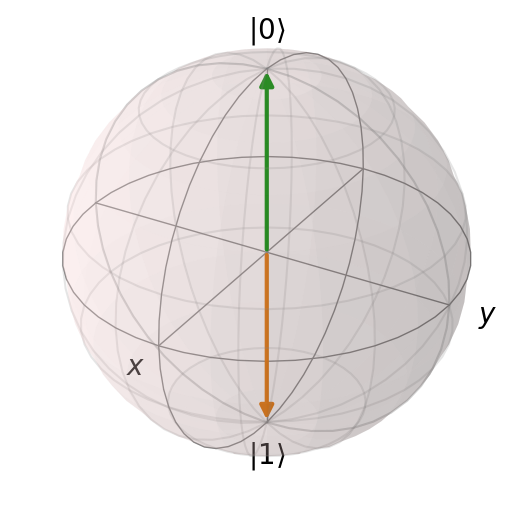

In [47]:
bloch = qutip.Bloch()

bloch.add_states([qutip.ket2dm(q0), qutip.ket2dm(q1)])
bloch.add_states([rho])

bloch.show()

In [48]:
# p = 0.5 * (I + n . (sx, sy, sz))
# if p == 0.5 I, then n = (0, 0, 0)
rho == 0.5 * qutip.qeye(2)

True

In [49]:
basis = [qutip.qeye(2), sx, sy, sz]
for v in basis:
    display(v)
for v in basis:
    assert (v * v).tr() == 2.0
for v in basis:
    for w in basis:
        if v != w:
            assert (v * w).tr() == 0.0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

## Time-dependent operators

- Create a time-dependent operator
- What is a QobjEvo?
- Adding arguments

In QuTiP, time-dependent operators are represented by `qutip.QobjEvo` and *not* by `Qobj`. `QobjEvo` takes in a *list* of terms that are *added* together. Each term consists of a `Qobj` (the constant part) and a time-dependent coefficient function, like so:

```
sigmax_t = QobjEvo([[sx, "t"]])
```

Here `sx` is the operator and `"t"` is the time-dependent coefficient. Note that `"t"` is a string. `QobjEvo` turns this string into a very fast function for you. It's also just very convenient to be able to write the coefficient function compactly.

Try out some other operators and some other coefficients, for example, `"cos(t)"` and `"sin(t)"`.

You can evaluate a `QobjEvo` at a particular time by calling, for example, `sigmax_t(2)` or `sigmax_t(0.1)`, or any other time. Create a state object that depends on time and plot its evolution on the Bloch sphere.

Lastly you can define coefficients that depend on arguments, such as `"cos(w * t)"`. You need to supply an initial value for the arguments when creating the `QobjEvo`, like so:

```
sigmax_cos_t = QobjEvo([[sx, "cos(w * t)"]], args={"w": np.pi})
```

You can supply a different argument when calling the `QobjEvo`, for example, `sigmax_cos_t(0.1, {"w": np.pi / 4})`.

In [50]:
# Create a simple quantum object that represents sx * t
sigmax_t = qutip.QobjEvo([[sx, "t"]])

In [51]:
display(sigmax_t)
display_list([
    sigmax_t(t) for t in [0.0, 0.25, 0.5, 1.0]
])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.   0.25]
 [0.25 0.  ]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.  0.5]
 [0.5 0. ]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [52]:
# Multiplication:
display_list([
    (0.1 * sigmax_t)(1.0),
    (0.5 * sigmax_t)(1.0),
])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.  0.1]
 [0.1 0. ]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.  0.5]
 [0.5 0. ]]

In [53]:
# Addition:
sigmay_t = qutip.QobjEvo([[sy, "t"]])
display_list([
    (sigmax_t * sigmay_t)(1.0),
])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]

In [54]:
# Take the conjugate and the adjoint:
display_list([
    sigmay_t.conj()(0.5),
    sigmay_t.dag()(0.5),
])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j  0.+0.5j]
 [0.-0.5j 0.+0.j ]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j  0.-0.5j]
 [0.+0.5j 0.+0.j ]]

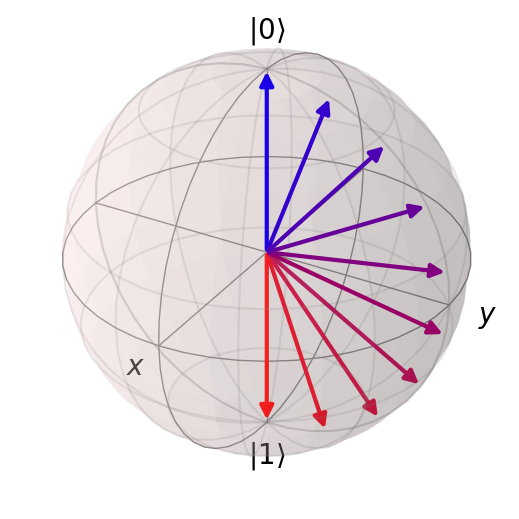

In [55]:
# Plotting the evolution under sigmax_t
states = [(1j * sigmax_t(t)).expm() * q0 for t in np.linspace(0, np.pi / 2, 10)]
show_bloch(states, vector_color="rb")

In [56]:
# Including a constant term
sz_plus_sy_t = qutip.QobjEvo([sz, [sy, "t"]])
display_list([
    sz_plus_sy_t(0.1),
    sz_plus_sy_t(1.0),
])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j  0.-1.j]
 [ 0.+1.j -1.+0.j]]

In [57]:
# Using a function like sin()
sz_sin_t = qutip.QobjEvo([[sz, "sin(t)"]])
display_list([
    sz_sin_t(t) for t in np.linspace(0, np.pi / 2, 4)
])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.  -0.5]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.8660254  0.       ]
 [ 0.        -0.8660254]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [58]:
# Supplying arguments other than time
sz_g_sin_t = qutip.QobjEvo([[sz, "g * sin(t)"]], args={"g": 2.0})
display_list([
    sz_g_sin_t(np.pi / 2, args={"g" : g}) for g in [0, 0.2, 0.4]
])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.2  0. ]
 [ 0.  -0.2]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.4  0. ]
 [ 0.  -0.4]]

## Tensor products and partial traces

- Construct a state with two or three qubits
- Construct an operator on multiple qubits
- Construct an entangled state
- Take the partial trace of a product state
- Take the partial trace of an entangled state

QuTiP has two very useful methods for combining and separating sub-systems of a larger quantum state. Read about `qutip.tensor` and `Qobj.ptrace` and try them out.

In [59]:
q00 = qutip.tensor([q0, q0])
q00

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [60]:
pt_q0 = q00.ptrace(0)
pt_q0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [61]:
q01 = qutip.tensor([q0, q1])
q01

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [62]:
display_list([
    q01.ptrace(0),
    q01.ptrace(1),
])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

## Hamiltonians

- Building Hamiltonians
- Plotting eigenvalues

Now use everything you've learned so far to construct a time-dependent Hamiltonian and plot the evolution of its eigenvalues over time.

In [63]:
H = qutip.QobjEvo([[sx, "a * cos(t)"], [sy, "b * sin(t)"]], args={"a": 0.2, "b": 0.1})

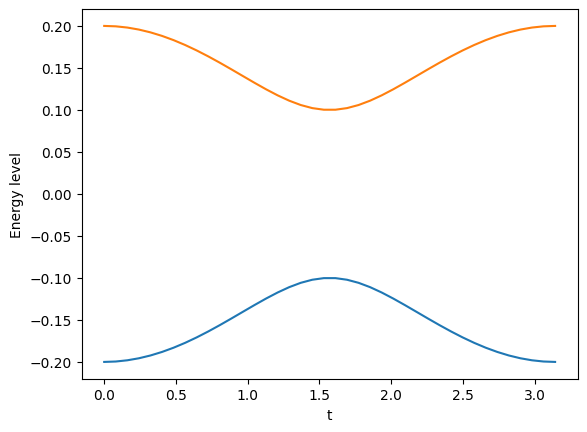

In [64]:
tlist = np.linspace(0, np.pi, 40)
evals = np.array([H(t).eigenenergies() for t in tlist])

plt.plot(tlist, evals[:, 0])
plt.plot(tlist, evals[:, 1])
plt.ylabel("Energy level")
plt.xlabel("t");

## Solving the Schrödinger Equation using sesolve

- Plotting the states
- Plotting the states on the Bloch sphere
- Plotting expectation values


QuTiP's function for solving the Schrödinger equation is `qutip.sesolve`. `sesolve` returns a `result` object that has a `.states` attribute containing the states of the system at each requested time.

Or you can pass a list of expectation operators and then `result` will have a `.expect` attribute that contains the expectation values of each operator at each time. `.expect[0]` will contain the values of the first operator, `.expect[1]` all the values of the second operator, and so on.

Try it out and plot the results!

If you need to plot values, you can use `plt.plot(x, y, label="Label for this plot")`. You can read the help for `plt.plot` to find out more.

In [65]:
tlist = np.linspace(0, np.pi, 40)
result = qutip.sesolve(H, q0, tlist)

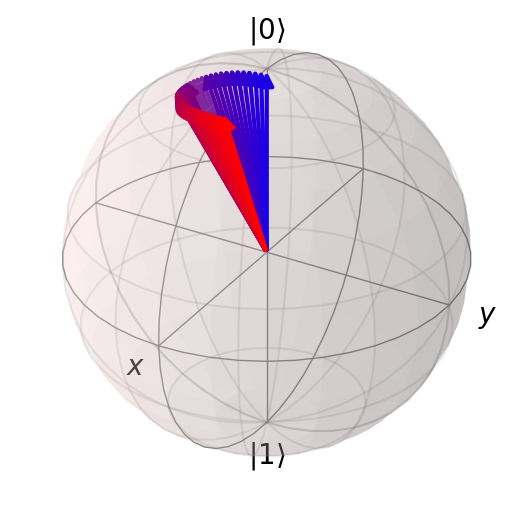

In [66]:
show_bloch(result.states, vector_color="rb")

## Using functions to make your notebooks neater

- Write a function for displaying the eigenstates of an operator
- Write a function for displaying states on the Bloch sphere

In [67]:
# See the helper functions at the top for examples.